In [1]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as FF

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
%matplotlib inline
import seaborn as sns
# Bokeh
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, CustomJS, ColumnDataSource, Slider
from bokeh.layouts import column
from bokeh.palettes import all_palettes
output_notebook()

Loading BokehJS ...

In [2]:
# set up fake data (remove when we have real data)
# import urllib.request
# import numpy as np

# word_url = "http://svnweb.freebsd.org/csrg/share/dict/words?view=co&content-type=text/plain"
# response = urllib.request.urlopen(word_url)
# long_txt = response.read().decode()
# words = long_txt.splitlines()

# random_word_indices = np.random.randint(0,25486,100)
# random_words = []
# random_term_frequency = []
# random_importance = []
# for index in random_word_indices:
#     random_words.append(words[index])
#     random_term_frequency.append(np.random.randint(1,500))
#     random_importance.append(np.random.random())

# term_frequency_vs_importance_df = pd.DataFrame({
#     'term': random_words,
#     'term-frequency': random_term_frequency,
#     'importance': random_importance
# })

# term_frequency_vs_importance_df.head()

In [3]:
# Uncomment when this is given as a file
term_frequency_vs_importance_df = pd.read_csv('../backendOutput/term-frequency-vs-importance.csv')

term_frequency_vs_importance_df.head()

,term,term-frequency,importance
0,apple,100,0.9
1,circus,50,0.7
2,science,200,0.5


# Term-Frequency vs. Importance

This will take data in the format of:

```
term,term-frequency,importance
apple,105,0.5
orange,110,0.6
...
```

In [4]:
trace = go.Scatter(
    x=term_frequency_vs_importance_df['term-frequency'], 
    y=term_frequency_vs_importance_df['importance'],
    mode='markers', 
    text=term_frequency_vs_importance_df['term'],
    name='term-frequency vs. importance')

layout = go.Layout(title="Term-frequency vs. Importance",
                   xaxis={'title':'Importance'},
                   yaxis={'title':'Term-frequency'}
                  )

fig = go.Figure(data=[trace], layout=layout)

iplot(fig, filename="term-frequency-vs-importance")

## Box-Plot for Average Document Length

In [5]:
# set up fake data (remove when we have real data)
import urllib.request
import numpy as np

word_url = "http://svnweb.freebsd.org/csrg/share/dict/words?view=co&content-type=text/plain"
response = urllib.request.urlopen(word_url)
long_txt = response.read().decode()
words = long_txt.splitlines()

random_word_indices = np.random.randint(0,25486,100)
random_document_name = []
random_number_of_words = []
for index in random_word_indices:
    random_document_name.append(words[index])
    random_number_of_words.append(np.random.randint(1,500))

document_length_df = pd.DataFrame({
    'document-name': random_document_name,
    'number-of-words': random_number_of_words,
})

document_length_df.head()

,document-name,number-of-words
0,wangle,42
1,facial,364
2,lake,101
3,experiment,63
4,harangue,95


In [6]:
trace = go.Box(
            name='Document Word Counts',
            y=document_length_df['number-of-words'],
            boxpoints='all'
)

data = [trace]

iplot(data)

# LDA Topics with t-SNE and Bokeh

In [7]:
ldamodel_df = pd.read_csv('../backendOutput/ldamodelAsMatrix.csv')

ldamodel_np = ldamodel_df.to_numpy();

In [8]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=2017, perplexity=30)
tsne_embedding = tsne.fit_transform(ldamodel_np)
tsne_embedding = pd.DataFrame(tsne_embedding, columns=['x','y'])
tsne_embedding['hue'] = ldamodel_np.argmax(axis=1)

In [9]:
source = ColumnDataSource(
    data=dict(
        x = tsne_embedding.x,
        y = tsne_embedding.y,
        colors = [all_palettes['Spectral'][10][i] for i in tsne_embedding.hue],

        alpha = [0.9] * tsne_embedding.shape[0],
        size = [7] * tsne_embedding.shape[0]
    )
)
hover_tsne = HoverTool(names=["ldamodel_df"], tooltips="""
    <div style="margin: 10">
        <div style="margin: 0 auto; width:300px;">
            <span style="font-size: 12px; font-weight: bold;">Title:</span>
            <span style="font-size: 12px">(Figure out what this would be)</span>
        </div>
    </div>
    """)
                      
tools_tsne = [hover_tsne, 'pan', 'wheel_zoom', 'reset']
plot_tsne = figure(plot_width=700, plot_height=700, tools=tools_tsne, title="20 News Groups")
plot_tsne.circle('x', 'y', size='size', fill_color='colors', 
                 alpha='alpha', line_alpha=0, line_width=0.01, source=source, name="ldamodel_df")

layout = column(plot_tsne)

In [10]:
show(layout)

# Word Cloud

In [11]:
import csv

#topics = pd.read_csv('topics.csv', delimiter=',').to_numpy()

with open('../backendOutput/topics.csv', 'r') as myfile:
     r = csv.reader(myfile)
     topics = list(r)

print(topics)

[['(0', " [('i'", ' 0.017246613)', " ('the'", ' 0.009697367)', " ('god'", ' 0.009168766)', " ('-pron-'", ' 0.0047827344)', " ('jesus'", ' 0.00472886)', " ('write'", ' 0.0046513015)', " ('from'", ' 0.004279141)', " ('know'", ' 0.0040988415)', " ('he'", ' 0.0038246296)', " ('it'", ' 0.0038142449)])'], ['(1', " [('i'", ' 0.016217778)', " ('the'", ' 0.009109182)', " ('from'", ' 0.005531492)', " ('write'", ' 0.0050987476)', " ('organization'", ' 0.0048977523)', " ('if'", ' 0.004434451)', " ('image'", ' 0.0042903437)', " ('know'", ' 0.003882055)', " ('-pron-'", ' 0.003879606)', " ('subject_re'", ' 0.0036819985)])'], ['(2', " [('i'", ' 0.009872745)', " ('write'", ' 0.007703849)', " ('the'", ' 0.006576132)', " ('point'", ' 0.005795977)', " ('organization'", ' 0.005597064)', " ('from'", ' 0.00511089)', " ('it'", ' 0.0041085845)', " ('work'", ' 0.0033797026)', " ('know'", ' 0.0033601513)', " ('subject_re'", ' 0.0033241874)])'], ['(3', " [('i'", ' 0.03361485)', " ('the'", ' 0.009500701)', " ('-pr

ValueError: dictionary update sequence element #0 has length 1; 2 is required

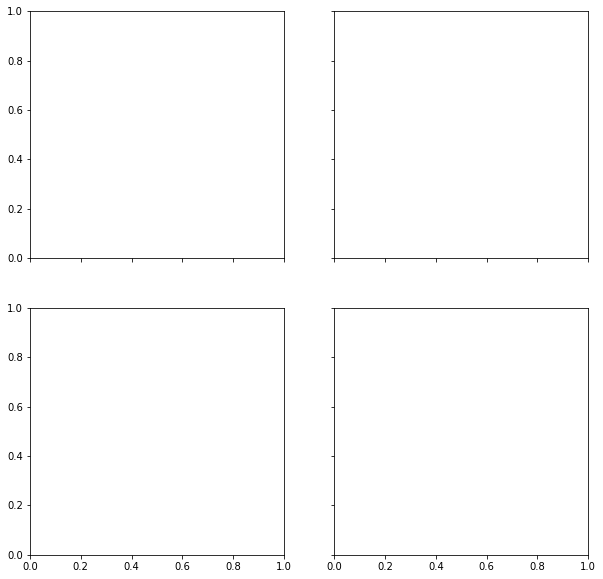

In [12]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
cloud = WordCloud(background_color='white', 
                  width=2500, 
                  height=1800, 
                  max_words=20,
                 colormap='tab10',
                 color_func=lambda *args, **kwargs: cols[i],
                 prefer_horizontal=1.0)

fig, axes = plt.subplots(2,2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i))
    plt.gca().axis('off')
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show() 